Last updated: 16 Feb 2023

# PyCaret Multiclass Classification on digits dataset

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# 🚀 Quick start

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems. It provides several pre-processing features that prepare the data for modeling through the setup function. It has over 18 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret consist of following 5 steps in this order:

## **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**

In [3]:
# loading digits dataset
from sklearn.datasets import load_digits
import pandas as pd

X, y = load_digits(as_frame=True, return_X_y=True)
data = X.copy()
data['target'] = y
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [4]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data=data, target='target', session_id=42, use_gpu=True, verbose=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [5]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [6]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [7]:
# init setup on exp
exp.setup(data, target = 'target', session_id = 123)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(1797, 65)"
4,Transformed data shape,"(1797, 65)"
5,Transformed train set shape,"(1257, 65)"
6,Transformed test set shape,"(540, 65)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [8]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9841,0.9986,0.9841,0.9854,0.9840,0.9823,0.9825,0.0500
et,Extra Trees Classifier,0.9793,0.9995,0.9793,0.9809,0.9793,0.9770,0.9772,0.2180
rf,Random Forest Classifier,0.9753,0.9993,0.9753,0.9777,0.9754,0.9726,0.9728,0.2920
lightgbm,Light Gradient Boosting Machine,0.9745,0.9996,0.9745,0.9763,0.9745,0.9717,0.9719,14.8670
xgboost,Extreme Gradient Boosting,0.9682,0.9993,0.9682,0.9711,0.9683,0.9646,0.9649,0.4050
gbc,Gradient Boosting Classifier,0.9666,0.0000,0.9666,0.9694,0.9664,0.9629,0.9632,4.3450
lr,Logistic Regression,0.9618,0.0000,0.9618,0.9646,0.9620,0.9576,0.9578,0.0990
lda,Linear Discriminant Analysis,0.9539,0.0000,0.9539,0.9577,0.9539,0.9487,0.9491,0.0500
svm,SVM - Linear Kernel,0.9491,0.0000,0.9491,0.9535,0.9489,0.9434,0.9439,0.0650
ridge,Ridge Classifier,0.9323,0.0000,0.9323,0.9368,0.9316,0.9248,0.9254,0.0300


In [9]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9881,0.9977,0.9881,0.9891,0.9880,0.9867,0.9869,0.0190
et,Extra Trees Classifier,0.9777,0.9995,0.9777,0.9796,0.9774,0.9752,0.9755,0.1080
catboost,CatBoost Classifier,0.9753,0.9995,0.9753,0.9773,0.9752,0.9726,0.9728,8.8210
rf,Random Forest Classifier,0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676,0.1420
lr,Logistic Regression,0.9658,0.0000,0.9658,0.9685,0.9655,0.9620,0.9623,2.3040
lightgbm,Light Gradient Boosting Machine,0.9634,0.9994,0.9634,0.9668,0.9630,0.9593,0.9597,1.5650
xgboost,Extreme Gradient Boosting,0.9586,0.9990,0.9586,0.9624,0.9585,0.9540,0.9545,0.1940
gbc,Gradient Boosting Classifier,0.9562,0.0000,0.9562,0.9603,0.9561,0.9513,0.9518,1.7300
svm,SVM - Linear Kernel,0.9555,0.0000,0.9555,0.9606,0.9552,0.9505,0.9511,0.0310
lda,Linear Discriminant Analysis,0.9523,0.0000,0.9523,0.9561,0.9524,0.9470,0.9474,0.0170


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

Notice that the output between functional and OOP API is consistent. Rest of the functions in this notebook will only be shown using functional API only.

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

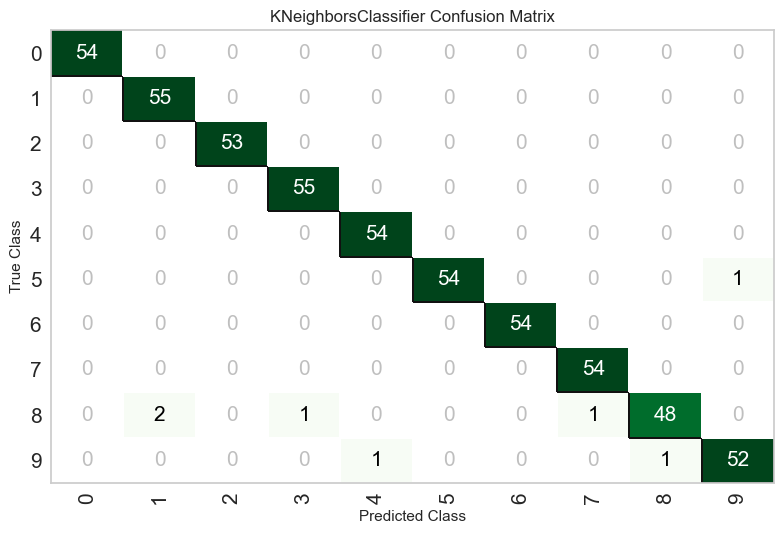

In [10]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

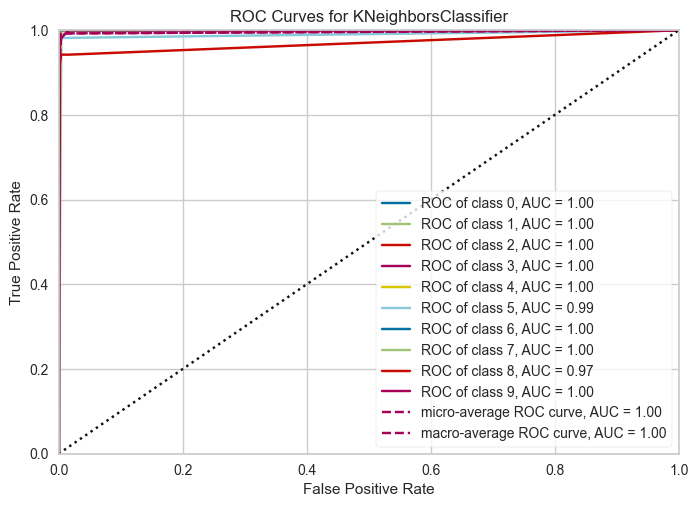

In [11]:
# plot AUC
plot_model(best, plot = 'auc')

In [12]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [13]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [14]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9870,0.9959,0.9870,0.9871,0.9869,0.9856,0.9856


In [15]:
# show predictions df
holdout_pred.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,prediction_label,prediction_score
1008,0.0,0.0,11.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,16.0,16.0,16.0,16.0,12.0,1,1,1.0
83,0.0,2.0,13.0,15.0,10.0,4.0,0.0,0.0,0.0,0.0,...,2.0,12.0,14.0,11.0,1.0,0.0,0.0,3,3,1.0
1752,0.0,0.0,4.0,10.0,12.0,7.0,0.0,0.0,0.0,0.0,...,0.0,1.0,9.0,10.0,0.0,0.0,0.0,1,1,1.0
781,0.0,2.0,13.0,16.0,16.0,16.0,15.0,2.0,0.0,8.0,...,2.0,16.0,16.0,6.0,0.0,0.0,0.0,5,5,1.0
1105,0.0,0.0,2.0,14.0,14.0,6.0,0.0,0.0,0.0,0.0,...,0.0,3.0,14.0,16.0,13.0,5.0,0.0,0,0,1.0


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [16]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('target', axis=1, inplace=True)
new_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,prediction_label,prediction_score
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,1.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,0.8
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,1.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,1.0


## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [18]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pixel_0_0', 'pixel_0_1',
                                              'pixel_0_2', 'pixel_0_3',
                                              'pixel_0_4', 'pixel_0_5',
                                              'pixel_0_6', 'pixel_0_7',
                                              'pixel_1_0', 'pixel_1_1',
                                              'pixel_1_2', 'pixel_1_3',
                                              'pixel_1_4', 'pixel_1_5',
                                              'pixel_1_6', 'pixel_1_7',
                                              'pixel_2_0', 'pixel_2_1',
                                              'pixel_2_2', 'pixel_2_3',
                                              'pi...
                  TransformerWrapper(exclude=None, include=[],
                                  

In [19]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\019101~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pixel_0_0', 'pixel_0_1',
                                             'pixel_0_2', 'pixel_0_3',
                                             'pixel_0_4', 'pixel_0_5',
                                             'pixel_0_6', 'pixel_0_7',
                                             'pixel_1_0', 'pixel_1_1',
                                             'pixel_1_2', 'pixel_1_3',
                                             'pixel_1_4', 'pixel_1_5',
                                             'pixel_1_6', 'pixel_1_7',
                                             'pixel_2...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('trained_model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

# 👇 Detailed function-by-function overview

## ✅ Setup
This function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional and are used for configuring data preprocessing pipeline.

In [20]:
s = setup(data, target = 'target', session_id = 123, use_gpu=True, verbose=False)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

To access all the variables created by the setup function such as transformed dataset, random_state, etc. you can use `get_config` method.

In [21]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [22]:
# lets access X_train_transformed
get_config('X_train_transformed')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
970,0.0,0.0,0.0,3.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,16.0,4.0,0.0,0.0
1006,0.0,1.0,12.0,16.0,10.0,1.0,0.0,0.0,0.0,8.0,...,12.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,8.0,0.0
145,0.0,4.0,15.0,16.0,16.0,16.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,5.0,16.0,16.0,12.0,0.0,0.0,0.0
1596,0.0,0.0,7.0,15.0,15.0,6.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,5.0,15.0,15.0,2.0,0.0,0.0
360,0.0,0.0,1.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,0.0,0.0,1.0,12.0,16.0,11.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,0.0,0.0,13.0,16.0,9.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,16.0,3.0,0.0,0.0
1178,0.0,0.0,0.0,8.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,13.0,2.0,0.0,0.0
802,0.0,0.0,0.0,11.0,13.0,5.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,1.0,10.0,16.0,11.0,1.0,0.0
958,0.0,0.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,4.0,0.0,0.0,9.0,16.0,16.0,16.0,16.0,13.0


In [23]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


All the preprocessing configurations and experiment settings/parameters are passed into the `setup` function. To see all available parameters, check the docstring:

In [24]:
# help(setup)

In [25]:
# init setup with normalize = True

s = setup(data, target = 'target', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(1797, 65)"
4,Transformed data shape,"(1797, 65)"
5,Transformed train set shape,"(1257, 65)"
6,Transformed test set shape,"(540, 65)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple


<Axes: >

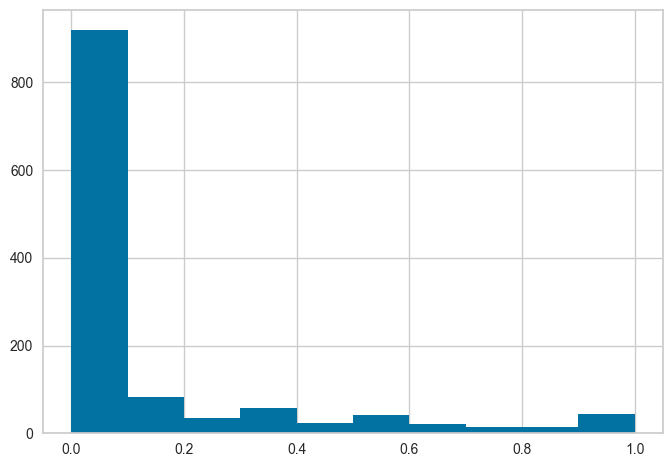

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['pixel_7_6'].hist()

Notice that all the values are between 0 and 1 - that is because we passed `normalize=True` in the `setup` function. If you don't remember how it compares to actual data, no problem - we can also access non-transformed values using `get_config` and then compare. See below and notice the range of values on x-axis and compare it with histogram above.

<Axes: >

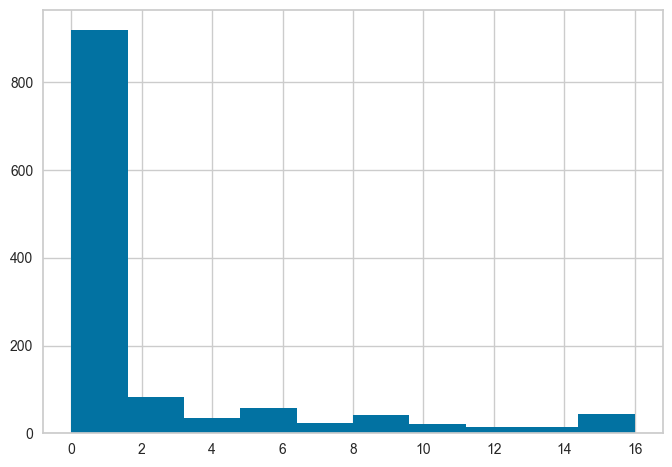

In [27]:
get_config('X_train')['pixel_7_6'].hist()

## ✅ Compare Models
This function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [28]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9889,0.9973,0.9889,0.9899,0.9888,0.9876,0.9877,0.0280
et,Extra Trees Classifier,0.9777,0.9995,0.9777,0.9796,0.9774,0.9752,0.9755,0.1110
catboost,CatBoost Classifier,0.9753,0.9995,0.9753,0.9773,0.9752,0.9726,0.9728,8.3960
rf,Random Forest Classifier,0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676,0.1200
lr,Logistic Regression,0.9650,0.0000,0.9650,0.9675,0.9648,0.9611,0.9614,0.0270
lightgbm,Light Gradient Boosting Machine,0.9634,0.9994,0.9634,0.9668,0.9630,0.9593,0.9597,1.0330
xgboost,Extreme Gradient Boosting,0.9586,0.9990,0.9586,0.9624,0.9585,0.9540,0.9545,0.1600
svm,SVM - Linear Kernel,0.9562,0.0000,0.9562,0.9598,0.9556,0.9513,0.9518,0.0240
gbc,Gradient Boosting Classifier,0.9562,0.0000,0.9562,0.9603,0.9561,0.9513,0.9518,1.5850
lda,Linear Discriminant Analysis,0.9523,0.0000,0.9523,0.9561,0.9524,0.9470,0.9474,0.0170


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [29]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [30]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'catboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9777,0.9995,0.9777,0.9796,0.9774,0.9752,0.9755,0.1240
catboost,CatBoost Classifier,0.9753,0.9995,0.9753,0.9773,0.9752,0.9726,0.9728,8.0690
rf,Random Forest Classifier,0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676,0.1560
lightgbm,Light Gradient Boosting Machine,0.9634,0.9994,0.9634,0.9668,0.9630,0.9593,0.9597,1.3970
xgboost,Extreme Gradient Boosting,0.9586,0.9990,0.9586,0.9624,0.9585,0.9540,0.9545,0.1290
gbc,Gradient Boosting Classifier,0.9562,0.0000,0.9562,0.9603,0.9561,0.9513,0.9518,1.7900
dt,Decision Tree Classifier,0.8313,0.9063,0.8313,0.8401,0.8295,0.8125,0.8138,0.0270


In [31]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [32]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9777,0.9995,0.9777,0.9796,0.9774,0.9752,0.9755,0.124
catboost,CatBoost Classifier,0.9753,0.9995,0.9753,0.9773,0.9752,0.9726,0.9728,8.069
rf,Random Forest Classifier,0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676,0.156
lightgbm,Light Gradient Boosting Machine,0.9634,0.9994,0.9634,0.9668,0.9630,0.9593,0.9597,1.397
xgboost,Extreme Gradient Boosting,0.9586,0.9990,0.9586,0.9624,0.9585,0.9540,0.9545,0.129
gbc,Gradient Boosting Classifier,0.9562,0.0000,0.9562,0.9603,0.9561,0.9513,0.9518,1.790
dt,Decision Tree Classifier,0.8313,0.9063,0.8313,0.8401,0.8295,0.8125,0.8138,0.027


By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `Recall`.

In [33]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9889,0.9973,0.9889,0.9899,0.9888,0.9876,0.9877,0.0180
et,Extra Trees Classifier,0.9777,0.9995,0.9777,0.9796,0.9774,0.9752,0.9755,0.1020
catboost,CatBoost Classifier,0.9753,0.9995,0.9753,0.9773,0.9752,0.9726,0.9728,7.7970
rf,Random Forest Classifier,0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676,0.1270
lr,Logistic Regression,0.9650,0.0000,0.9650,0.9675,0.9648,0.9611,0.9614,0.0350
lightgbm,Light Gradient Boosting Machine,0.9634,0.9994,0.9634,0.9668,0.9630,0.9593,0.9597,1.8670
xgboost,Extreme Gradient Boosting,0.9586,0.9990,0.9586,0.9624,0.9585,0.9540,0.9545,0.1670
svm,SVM - Linear Kernel,0.9562,0.0000,0.9562,0.9598,0.9556,0.9513,0.9518,0.0330
gbc,Gradient Boosting Classifier,0.9562,0.0000,0.9562,0.9603,0.9561,0.9513,0.9518,1.7850
lda,Linear Discriminant Analysis,0.9523,0.0000,0.9523,0.9561,0.9524,0.9470,0.9474,0.0150


In [34]:
# list of top 3 models by Recall
best_recall_models_top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [35]:
# help(compare_models)

## ✅ Experiment Logging
PyCaret integrates with many different type of experiment loggers (default = 'mlflow'). To turn on experiment tracking in PyCaret you can set `log_experiment` and `experiment_name` parameter. It will automatically track all the metrics, hyperparameters, and artifacts based on the defined logger.

In [36]:
# from pycaret.classification import *
s = setup(data, target = 'Class variable', log_experiment='mlflow', experiment_name='iris_experiment')

In [37]:
# compare models
 best = compare_models()

In [38]:
# start mlflow server on localhost:5000
 !mlflow ui

By default PyCaret uses `MLFlow` logger that can be changed using `log_experiment` parameter. Following loggers are available:
    
    - mlflow
    - wandb
    - comet_ml
    - dagshub
    
Other logging related parameters that you may find useful are:

- experiment_custom_tags
- log_plots
- log_data
- log_profile

For more information check out the docstring of the `setup` function.

In [39]:
# help(setup)

## ✅ Create Model
This function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the models function.

In [40]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [41]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.0000,0.9762,0.9783,0.9764,0.9735,0.9737
1,0.9762,0.0000,0.9762,0.9768,0.9762,0.9735,0.9736
2,0.9841,0.0000,0.9841,0.9853,0.9838,0.9824,0.9826
3,0.9603,0.0000,0.9603,0.9653,0.9605,0.9559,0.9564
4,0.9603,0.0000,0.9603,0.9633,0.9609,0.9559,0.9561
5,0.9762,0.0000,0.9762,0.9779,0.9758,0.9735,0.9738
6,0.9683,0.0000,0.9683,0.9717,0.9681,0.9647,0.9651
7,0.9440,0.0000,0.9440,0.9480,0.9438,0.9378,0.9383
8,0.9520,0.0000,0.9520,0.9554,0.9510,0.9466,0.9472


The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [42]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.0,0.9762,0.9783,0.9764,0.9735,0.9737
1,0.9762,0.0,0.9762,0.9768,0.9762,0.9735,0.9736
2,0.9841,0.0,0.9841,0.9853,0.9838,0.9824,0.9826
3,0.9603,0.0,0.9603,0.9653,0.9605,0.9559,0.9564
4,0.9603,0.0,0.9603,0.9633,0.9609,0.9559,0.9561
5,0.9762,0.0,0.9762,0.9779,0.9758,0.9735,0.9738
6,0.9683,0.0,0.9683,0.9717,0.9681,0.9647,0.9651
7,0.9440,0.0,0.9440,0.9480,0.9438,0.9378,0.9383
8,0.9520,0.0,0.9520,0.9554,0.9510,0.9466,0.9472


In [43]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.0000,0.9714,0.9718,0.9714,0.9682,0.9682
1,0.9594,0.0000,0.9594,0.9608,0.9598,0.9549,0.9550
2,0.9594,0.0000,0.9594,0.9601,0.9593,0.9549,0.9550
Mean,0.9634,0.0000,0.9634,0.9642,0.9635,0.9593,0.9594
Std,0.0056,0.0000,0.0056,0.0054,0.0056,0.0063,0.0062


In [44]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9762,0.0000,0.9762,0.9783,0.9764,0.9735,0.9737
1,0.9762,0.0000,0.9762,0.9768,0.9762,0.9735,0.9736
2,0.9683,0.0000,0.9683,0.9682,0.9676,0.9647,0.9649
3,0.9524,0.0000,0.9524,0.9574,0.9528,0.9471,0.9476
4,0.9524,0.0000,0.9524,0.9559,0.9530,0.9471,0.9474
5,0.9762,0.0000,0.9762,0.9789,0.9760,0.9735,0.9739
6,0.9444,0.0000,0.9444,0.9474,0.9442,0.9383,0.9387
7,0.9360,0.0000,0.9360,0.9424,0.9359,0.9289,0.9297
8,0.9440,0.0000,0.9440,0.9473,0.9417,0.9378,0.9385


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:47:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [46]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [47]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8175,0.8985,0.8175,0.8221,0.8152,0.7972,0.7982
1,0.8333,0.9074,0.8333,0.8387,0.8288,0.8149,0.8165
2,0.8571,0.9205,0.8571,0.8690,0.8546,0.8412,0.8427
3,0.8413,0.9117,0.8413,0.8494,0.8434,0.8236,0.8240
4,0.8175,0.8987,0.8175,0.8292,0.8187,0.7972,0.7981
5,0.8810,0.9340,0.8810,0.8914,0.8800,0.8677,0.8689
6,0.8413,0.9119,0.8413,0.8505,0.8314,0.8235,0.8263
7,0.8240,0.9023,0.8240,0.8324,0.8212,0.8044,0.8061
8,0.7840,0.8801,0.7840,0.7948,0.7851,0.7600,0.7609


In [48]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [49]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [50]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8175,0.8985,0.8175,0.8221,0.8152,0.7972,0.7982
1,0.8333,0.9074,0.8333,0.8387,0.8288,0.8149,0.8165
2,0.8571,0.9205,0.8571,0.8690,0.8546,0.8412,0.8427
3,0.8413,0.9117,0.8413,0.8494,0.8434,0.8236,0.8240
4,0.8175,0.8987,0.8175,0.8292,0.8187,0.7972,0.7981
5,0.8810,0.9340,0.8810,0.8914,0.8800,0.8677,0.8689
6,0.8413,0.9119,0.8413,0.8505,0.8314,0.8235,0.8263
7,0.8240,0.9023,0.8240,0.8324,0.8212,0.8044,0.8061
8,0.7840,0.8801,0.7840,0.7948,0.7851,0.7600,0.7609


Fitting 10 folds for each of 7 candidates, totalling 70 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7937,0.9546,0.7937,0.7961,0.7878,0.7707,0.7724
1,0.8095,0.9416,0.8095,0.8060,0.8015,0.7884,0.7898
2,0.7937,0.9541,0.7937,0.8055,0.7951,0.7707,0.7715
3,0.7778,0.9324,0.7778,0.7867,0.7734,0.7532,0.7552
4,0.7937,0.9200,0.7937,0.8029,0.7928,0.7707,0.7720
5,0.8571,0.9630,0.8571,0.8700,0.8548,0.8413,0.8432
6,0.8095,0.9559,0.8095,0.8216,0.8097,0.7883,0.7895
7,0.8160,0.9356,0.8160,0.8250,0.8139,0.7955,0.7969
8,0.7520,0.9289,0.7520,0.7699,0.7459,0.7244,0.7279


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [53]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['pixel_0_0',
                                                                          'pixel_0_1',
                                                                          'pixel_0_2',
                                                                          'pixel_0_3',
                                                                          'pixel_0_4',
                                                                          'pixel_0_5',
                                                                          'pixel_0_6',
                                                                          'pixel_0_7',
                                                                          'pixel_1_0',
                                                                          'pixel_1_1',
                                                                          'pixel_1_2',
                                                                          'p...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

In [54]:
! pip install optuna

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [56]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [57]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8175,0.0000,0.8175,0.8136,0.8129,0.7972,0.7977
1,0.8016,0.0000,0.8016,0.8057,0.7949,0.7796,0.7814
2,0.8651,0.0000,0.8651,0.8761,0.8616,0.8500,0.8516
3,0.8333,0.0000,0.8333,0.8431,0.8359,0.8147,0.8152
4,0.8254,0.0000,0.8254,0.8322,0.8260,0.8060,0.8066
5,0.8810,0.0000,0.8810,0.8890,0.8786,0.8677,0.8691
6,0.8492,0.0000,0.8492,0.8588,0.8425,0.8324,0.8346
7,0.8240,0.0000,0.8240,0.8297,0.8239,0.8044,0.8051
8,0.7680,0.0000,0.7680,0.7797,0.7668,0.7422,0.7437


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

Some other parameters that you might find very useful in `ensemble_model` are:

- choose_better
- n_estimators
- groups
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

## ✅ Blend Models

This function trains a Soft Voting / Majority Rule classifier for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [58]:
# top 3 models based on recall
best_recall_models_top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),

In [59]:
# blend top 3 models
blend_models(best_recall_models_top3)

VotingClassifier(estimators=[('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=...
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   random_state=123, verbose=0,
                                                   warm_start=False)),
                             ('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x00000226B70BA250>)],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

Some other parameters that you might find very useful in `blend_models` are:

- choose_better
- method
- weights
- fit_kwargs
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

In [60]:
# help(blend_models)

## ✅ Stack Models

This function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [61]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9921,0.0000,0.9921,0.9926,0.9921,0.9912,0.9912
2,0.9921,0.0000,0.9921,0.9926,0.9921,0.9912,0.9912
3,0.9841,0.0000,0.9841,0.9853,0.9841,0.9824,0.9825
4,0.9841,0.0000,0.9841,0.9853,0.9841,0.9824,0.9825
5,0.9921,0.0000,0.9921,0.9926,0.9920,0.9912,0.9912
6,0.9921,0.0000,0.9921,0.9927,0.9920,0.9912,0.9912
7,0.9760,0.0000,0.9760,0.9789,0.9759,0.9733,0.9737
8,0.9840,0.0000,0.9840,0.9852,0.9836,0.9822,0.9824


StackingClassifier(cv=5,
                   estimators=[('K Neighbors Classifier',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=-1, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf...
                                <catboost.core.CatBoostClassifier object at 0x00000226B7161BD0>)],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

Some other parameters that you might find very useful in `stack_models` are:

- choose_better
- meta_model
- method
- restack
- probability_threshold
- return_train_score

You can check the docstring of the function for more info.

## ✅ Plot Model

This function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

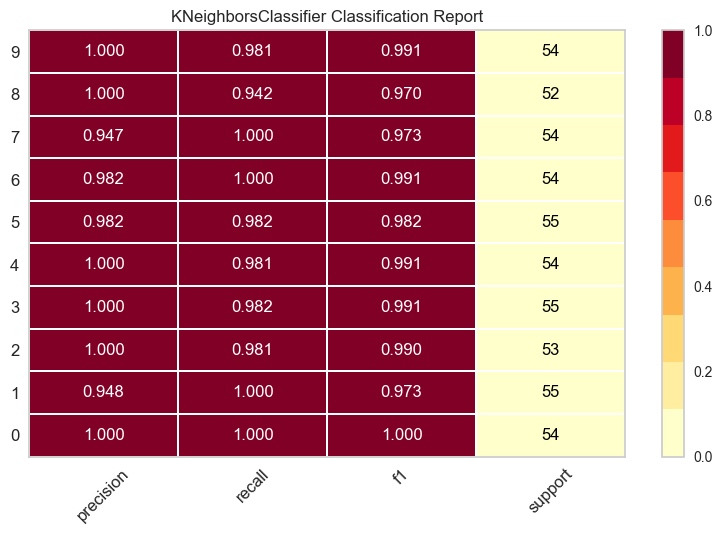

In [63]:
# plot class report
plot_model(best, plot = 'class_report')

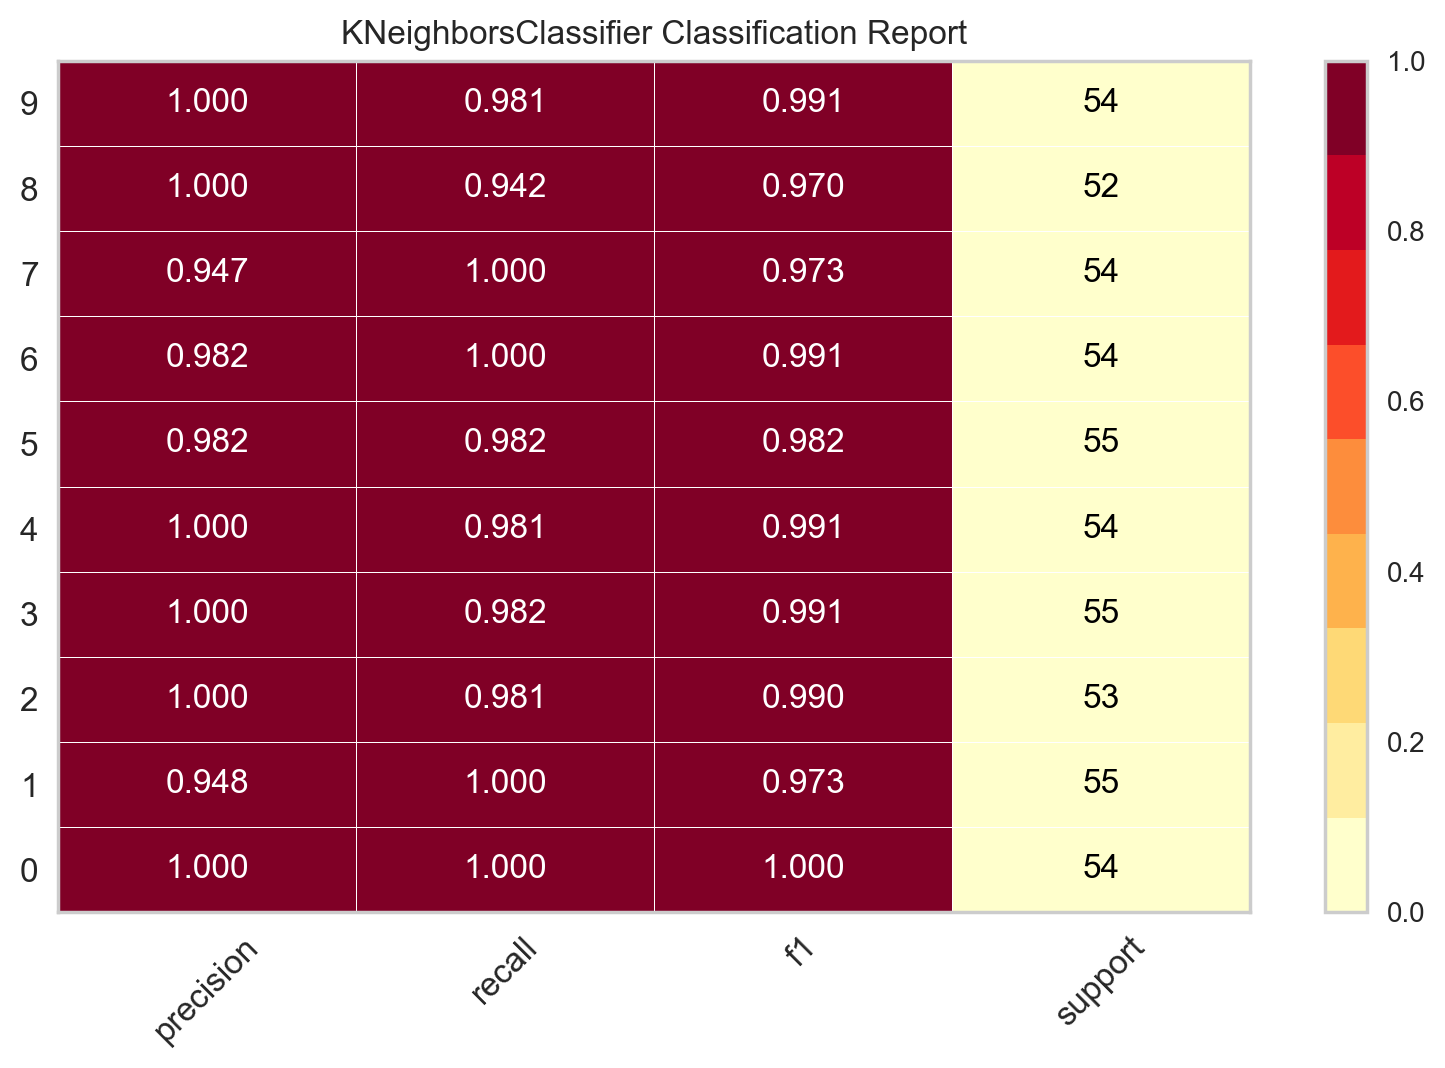

In [64]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [65]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [66]:
# help(plot_model)

## ✅ Interpret Model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

In [67]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9603,0.9994,0.9603,0.9621,0.9603,0.9559,0.9561
1,0.9762,0.9999,0.9762,0.9780,0.9762,0.9735,0.9737
2,0.9762,0.9997,0.9762,0.9789,0.9764,0.9735,0.9738
3,0.9683,0.9997,0.9683,0.9704,0.9685,0.9647,0.9649
4,0.9524,0.9993,0.9524,0.9558,0.9517,0.9471,0.9476
5,0.9921,0.9990,0.9921,0.9927,0.9920,0.9912,0.9912
6,0.9683,0.9996,0.9683,0.9717,0.9673,0.9647,0.9653
7,0.9440,0.9989,0.9440,0.9457,0.9432,0.9378,0.9381
8,0.9520,0.9989,0.9520,0.9607,0.9509,0.9466,0.9479


Some other parameters that you might find very useful in `interpret_model` are:

- plot
- feature
- use_train_data
- X_new_sample
- y_new_sample
- save

You can check the docstring of the function for more info.

## ✅ Get Leaderboard

This function returns the leaderboard of all models trained in the current setup.

In [72]:
# get leaderboard
lb = get_leaderboard()
lb

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.9650,0.0000,0.9650,0.9675,0.9648,0.9611,0.9614
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9889,0.9973,0.9889,0.9899,0.9888,0.9876,0.9877
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.8043,0.9709,0.8043,0.8478,0.8030,0.7826,0.7877
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8313,0.9063,0.8313,0.8401,0.8295,0.8125,0.8138
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.9562,0.0000,0.9562,0.9598,0.9556,0.9513,0.9518
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9340,0.0000,0.9340,0.9385,0.9329,0.9266,0.9273
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.9705,0.9992,0.9705,0.9729,0.9704,0.9672,0.9676
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.7732,0.0000,0.7732,0.7366,0.7370,0.7481,0.7594
8,Ada Boost Classifier,"(TransformerWrapper(exclude=None,\n ...",0.2634,0.0000,0.2634,0.2040,0.1958,0.1812,0.2612


In [76]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pixel_0_0', 'pixel_0_1',
                                             'pixel_0_2', 'pixel_0_3',
                                             'pixel_0_4', 'pixel_0_5',
                                             'pixel_0_6', 'pixel_0_7',
                                             'pixel_1_0', 'pixel_1_1',
                                             'pixel_1_2', 'pixel_1_3',
                                             'pixel_1_4', 'pixel_1_5',
                                             'pixel_1_6', 'pixel_1_7',
                                             'pixel_2_0', 'pixel_2_1',
                                             'pixel_2_2', 'pixel_2_3',
                                             'pi...
                                                 <catboost.core.CatBoostClassifier object at 0x00000226B7DF1150>)],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

Some other parameters that you might find very useful in `get_leaderboard` are:

- finalize_models
- fit_kwargs
- model_only
- groups

You can check the docstring of the function for more info.

## ✅ AutoML
This function returns the best model out of all trained models in the current setup based on the optimize parameter. Metrics evaluated can be accessed using the `get_metrics` function.

In [73]:
automl()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

## ✅ Create Docker
This function creates a `Dockerfile` and `requirements.txt` for productionalizing API end-point.

In [78]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [79]:
final_best = finalize_model(best)

In [ ]:
final_best

Pipeline(memory=FastMemory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['sepal_length', 'sepal_width',
                                             'petal_length', 'petal_width'],
                                    transformer=SimpleImputer(add_indicator=F...
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [82]:
# save model
save_model(best, 'multi_class_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pixel_0_0', 'pixel_0_1',
                                              'pixel_0_2', 'pixel_0_3',
                                              'pixel_0_4', 'pixel_0_5',
                                              'pixel_0_6', 'pixel_0_7',
                                              'pixel_1_0', 'pixel_1_1',
                                              'pixel_1_2', 'pixel_1_3',
                                              'pixel_1_4', 'pixel_1_5',
                                              'pixel_1_6', 'pixel_1_7',
                                              'pixel_2_0', 'pixel_2_1',
                                              'pixel_2_2', 'pixel_2_3',
                                              'pi...
                                                               keep_empty_features=False,
       

In [83]:
# load model
loaded_from_disk = load_model('multi_class_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\019101~1\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['pixel_0_0', 'pixel_0_1',
                                             'pixel_0_2', 'pixel_0_3',
                                             'pixel_0_4', 'pixel_0_5',
                                             'pixel_0_6', 'pixel_0_7',
                                             'pixel_1_0', 'pixel_1_1',
                                             'pixel_1_2', 'pixel_1_3',
                                             'pixel_1_4', 'pixel_1_5',
                                             'pixel_1_6', 'pixel_1_7',
                                             'pixel_2...
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=MinMaxScaler(clip=False,
                                                             copy=True,
                                                             feature_range=(0,
                                                                            1)))),
                ('trained_model',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=-1, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [84]:
# save experiment
save_experiment('my_experiment')

In [85]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(1797, 65)"
4,Transformed data shape,"(1797, 65)"
5,Transformed train set shape,"(1257, 65)"
6,Transformed test set shape,"(540, 65)"
7,Numeric features,64
8,Preprocess,True
9,Imputation type,simple
